## Notebook 3: Análise de Gêneros de Anime

### Carregamento dos Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

INPUT_DATA_PATH = './datas/'
OUTPUT_PATH = './outputs/'

In [2]:
df_animes = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'animes.csv'))

print(f"Animes: {df_animes.shape}")
df_animes[['title', 'genres']].head(10)

Animes: (20237, 13)


,title,genres
0,Howl's Moving Castle,"['Adventure', 'Award Winning', 'Drama', 'Fanta..."
1,Death Note,"['Supernatural', 'Suspense']"
2,Problem Children Are Coming from Another World...,"['Action', 'Comedy', 'Fantasy']"
3,BTOOOM!,"['Action', 'Sci-Fi', 'Suspense']"
4,Sword Art Online,"['Action', 'Adventure', 'Fantasy', 'Romance']"
5,Spirited Away,"['Adventure', 'Award Winning', 'Fantasy']"
6,Princess Mononoke,"['Action', 'Adventure', 'Award Winning', 'Fant..."
7,Magi: The Labyrinth of Magic,"['Action', 'Adventure', 'Fantasy']"
8,Accel World,"['Action', 'Romance', 'Sci-Fi']"
9,Eden of The East,"['Award Winning', 'Mystery', 'Romance', 'Sci-F..."


### Transformação: Extração e Limpeza de Gêneros

In [3]:
# Remover animes sem gênero
df_animes_clean = df_animes[df_animes['genres'].notna()].copy()

# Expandir gêneros (um anime pode ter múltiplos gêneros)
generos_expandidos = []
for genres in df_animes_clean['genres']:
    if isinstance(genres, str):
        genres = genres.removeprefix('[').removesuffix(']')
        generos = [g.strip() for g in genres.split(',')]
        generos_expandidos.extend(generos)

print(f"Total de gêneros (com repetições): {len(generos_expandidos)}")
print(f"Gêneros únicos: {len(set(generos_expandidos))}")

Total de gêneros (com repetições): 39078
Gêneros únicos: 22


### Análise 3: Distribuição de Gêneros (Group By)

In [4]:
df_generos = pd.DataFrame({'genero': generos_expandidos})
generos_count = df_generos.groupby('genero')['genero'].count().sort_values(ascending=False)

# Top 8 gêneros + "Outros"
top_generos = generos_count.head(8)
outros = generos_count[8:].sum()
top_generos = pd.concat([top_generos, pd.Series({'Outros': outros})])

print("Top 8 Gêneros + Outros:")
print(top_generos)

Top 8 Gêneros + Outros:
'Comedy'       6902
'Action'       5387
'Fantasy'      4714
'Adventure'    3709
'Sci-Fi'       3255
'Drama'        2836
'Romance'      2218
'Hentai'       1602
Outros         8455
dtype: int64


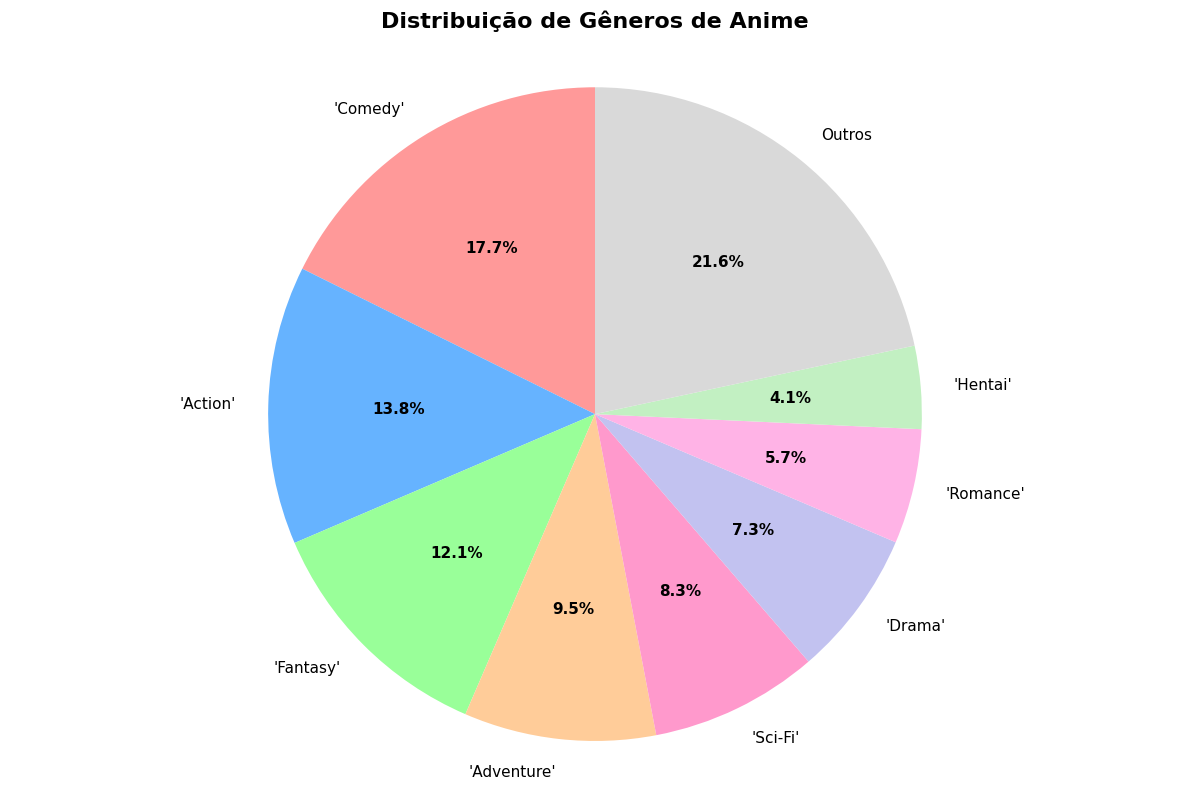

In [9]:
# Visualização em gráfico de pizza
plt.figure(figsize=(12, 8))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', 
          '#c2c2f0', '#ffb3e6', '#c2f0c2', '#d9d9d9']

wedges, texts, autotexts = plt.pie(top_generos, 
                                     labels=top_generos.index, 
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     textprops={'fontsize': 11})

# Style e Layout
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.title('Distribuição de Gêneros de Anime', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()

plt.savefig(os.path.join(OUTPUT_PATH, 'nb3_generos_pizza.png'), dpi=300, bbox_inches='tight')
plt.show()

#### Explicação do Gráfico

Este gráfico de pizza é tipo um raio-X dos gostos da comunidade anime! Cada fatia representa o quanto cada gênero aparece nos animes do dataset.

**Comedy** lidera de forma impressionante - e sinceramente, quem não gosta de dar umas risadas? Muitos animes usam comédia para quebrar momentos tensos ou simplesmente entreter, então não é surpresa ver essa dominância.

**Action** e **Fantasy** também pegam fatias generosas do gráfico. Faz sentido, né? Lutas épicas, poderes sobrenaturais, mundos fantásticos... as animações não sofrem com as barreiras do mundo real, sendo propicias para esse tipo de conteúdo que dificilmente (ou nunca) poderiamos ver!

**Adventure**, **Sci-Fi**, **Drama** e **Romance** aparecem com representatividade boa, mostrando que tem anime pra todo tipo de gosto - desde aventuras espaciais até dramas emocionantes e romances de fazer o coração apertar.

A presença de **Hentai** no gráfico é honesta e mostra que, bem, anime também tem seu lado +18...

A categoria **Outros** agrupa aqueles gêneros mais de nicho como Horror, Sports, Mystery e por aí vai.

Uma coisa legal de notar: a maioria dos animes não fica só em um gênero! Eles misturam Comedy com Action, Fantasy com Romance... é essa combinação que cria aquelas experiências únicas que só anime consegue entregar. O gráfico reflete os gêneros sozinhos, porém eles sempre atuam em grupo!